In [1]:
!pip install datasets textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires f

In [2]:
from datasets import load_dataset
import textstat

import pandas as pd

dataset = load_dataset("math-ai/MATH500", split="test")

math500_df = pd.DataFrame(dataset)
print(math500_df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/412 [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/447k [00:00<?, ?B/s]

Generating test split: 0 examples [00:00, ? examples/s]

                                             problem  \
0  Convert the point $(0,3)$ in rectangular coord...   
1  Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...   
2  If $f(x) = \frac{3x-2}{x-2}$, what is the valu...   
3  How many positive whole-number divisors does 1...   
4  The results of a cross-country team's training...   

                                            solution  \
0  We have that $r = \sqrt{0^2 + 3^2} = 3.$  Also...   
1  We count the number of times $\frac{1}{n^3}$ a...   
2  $f(-2)+f(-1)+f(0)=\frac{3(-2)-2}{-2-2}+\frac{3...   
3  First prime factorize $196=2^2\cdot7^2$.  The ...   
4  Evelyn covered more distance in less time than...   

                            answer               subject  level  \
0  \left( 3, \frac{\pi}{2} \right)           Precalculus      2   
1                            p - q  Intermediate Algebra      5   
2                     \frac{14}{3}               Algebra      3   
3                                9         Number Theory  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json

file_path = '/content/drive/MyDrive/Heuristic/math500_batch_001_500.jsonl'

with open(file_path, "r") as f:
  lines = f.readlines()
  data = [json.loads(line) for line in lines]

translations_df = pd.DataFrame(data)
print(translations_df.head())

translations_df["index"] = translations_df["index"] -1

merged_df = math500_df.merge(translations_df, left_index=True, right_on="index")

final_df = merged_df[["problem", "plain_english_problem", "level"]]

   index                              plain_english_problem
0      1  Convert the point with rectangular coordinates...
1      2  Let p be the sum from k equals 1 to infinity o...
2      3  Let f of x equal 3x minus 2 over x minus 2. Wh...
3      4  How many positive whole-number divisors does 1...
4      5  Based on the graph showing the training result...


In [5]:
print(final_df.head())

                                             problem  \
0  Convert the point $(0,3)$ in rectangular coord...   
1  Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...   
2  If $f(x) = \frac{3x-2}{x-2}$, what is the valu...   
3  How many positive whole-number divisors does 1...   
4  The results of a cross-country team's training...   

                               plain_english_problem  level  
0  Convert the point with rectangular coordinates...      2  
1  Let p be the sum from k equals 1 to infinity o...      5  
2  Let f of x equal 3x minus 2 over x minus 2. Wh...      3  
3  How many positive whole-number divisors does 1...      3  
4  Based on the graph showing the training result...      2  


In [6]:
'''import re

#print(dataset[1])

def clean_latex(text):
    # Replace display math with placeholder
    text = re.sub(r"\\\[.*?\\\]", " [MATH_EXPR] ", text, flags=re.DOTALL)
    text = re.sub(r"\$\$.*?\$\$", " [MATH_EXPR] ", text, flags=re.DOTALL)

    # Replace inline math
    text = re.sub(r"\$.*?\$", " [MATH_EXPR] ", text)
    text = re.sub(r"\\\(.*?\\\)", " [MATH_EXPR] ", text)

    # Replace environments like \begin{align*}...\end{align*}
    text = re.sub(r"\\begin\{.*?\}.*?\\end\{.*?\}", " [MATH_EXPR] ", text, flags=re.DOTALL)

    # Remove LaTeX commands and symbols
    text = re.sub(r"\\[a-zA-Z]+\{.*?\}", "", text)
    text = re.sub(r"\\[a-zA-Z]+", "", text)
    text = re.sub(r"[\{\}_\^&%]", "", text)

    # Clean up spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text
print(textstat.syllable_count("MATHY"))



#1 syllable = MATH
#2 syllable = MATHY
#3 syllable = [MATHEXPR]
#4 syllable = MATHEMATICS
#5 syllable = MATHMATOLOGY
#6 syllable = MATHEMATOLOGY
#replacing all Math expressions with a 5 syllable word. Intuition is math equation is a reasonably hard part of the problem
def custom_syllable(text, token="[MATHEXPR]", replacement="[MATHEXPR]"):
  return text.replace(token, replacement)

cleaned = clean_latex(dataset[1]["problem"])
cleaned = custom_syllable(cleaned)

print(cleaned)

print(textstat.flesch_kincaid_grade(cleaned))



def compute_fleshkincaid(example):
  #get problem text
  problem_text = example['problem']'''

'import re\n\n#print(dataset[1])\n\ndef clean_latex(text):\n    # Replace display math with placeholder\n    text = re.sub(r"\\\\[.*?\\\\]", " [MATH_EXPR] ", text, flags=re.DOTALL)\n    text = re.sub(r"\\$\\$.*?\\$\\$", " [MATH_EXPR] ", text, flags=re.DOTALL)\n\n    # Replace inline math\n    text = re.sub(r"\\$.*?\\$", " [MATH_EXPR] ", text)\n    text = re.sub(r"\\\\(.*?\\\\)", " [MATH_EXPR] ", text)\n\n    # Replace environments like \x08egin{align*}...\\end{align*}\n    text = re.sub(r"\\begin\\{.*?\\}.*?\\end\\{.*?\\}", " [MATH_EXPR] ", text, flags=re.DOTALL)\n\n    # Remove LaTeX commands and symbols\n    text = re.sub(r"\\[a-zA-Z]+\\{.*?\\}", "", text)\n    text = re.sub(r"\\[a-zA-Z]+", "", text)\n    text = re.sub(r"[\\{\\}_\\^&%]", "", text)\n\n    # Clean up spaces\n    text = re.sub(r"\\s+", " ", text).strip()\n    return text\nprint(textstat.syllable_count("MATHY"))\n\n\n\n#1 syllable = MATH\n#2 syllable = MATHY\n#3 syllable = [MATHEXPR]\n#4 syllable = MATHEMATICS\n#5 syllab

In [7]:
tempVal = final_df["plain_english_problem"][4]
print(tempVal)

print(textstat.flesch_reading_ease(tempVal))
print(textstat.flesch_kincaid_grade(tempVal))

Based on the graph showing the training results of a cross-country team, which student has the greatest average speed?
60.65
9.5


In [8]:
!pip install spacy benepar nltk

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.7 MB/s eta 0:00:00
  Created wheel for benepar: filename=benepar-0.2.0-py3-none-any.whl size=37625 sha256=c4d71cb841490f47566a813068ae3d91ab95959f7f5d99d6d86f9d51634c52eb
  Stored i

In [9]:
import spacy
import benepar
import nltk
from nltk.tree import Tree

nlp=spacy.load("en_core_web_sm")
benepar.download('benepar_en3')
nlp.add_pipe("benepar", config={"model": "benepar_en3"})

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [10]:
def get_tree_depth(text):
  try:
    doc = nlp(text)
    sent = list(doc.sents)[0] # Assume one sentence per problem
    tree_str = sent._.parse_string
    tree = Tree.fromstring(tree_str)
    return tree.height()-1
  except Exception as e:
    print(f"Error parsing: {text}\n{e}")
    return None

#Tree depth
final_df["syntax_tree_depth"] = final_df["plain_english_problem"].apply(get_tree_depth)

#word count
final_df["num_words"] = final_df["plain_english_problem"].apply(lambda s:len(s.split()))

#DEPTH per word. This is probably the interesting one. this controls for length so in theory the higher the score the more complex the problem is
final_df["depth_per_word"] = final_df["syntax_tree_depth"] / final_df["num_words"]

#Think of this as grade level in school. Lower grade level = easier
final_df["flesch_kincaid_grade"] = final_df["plain_english_problem"].apply(textstat.flesch_kincaid_grade)
#This one is a score 0-100, higher score = easier. need to review the thresholsd
final_df["flesch_reading_ease"] = final_df["plain_english_problem"].apply(textstat.flesch_reading_ease)

print(final_df.head())



You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.11/dist-packages/torch/distributions/distribution.py:56: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


                                             problem  \
0  Convert the point $(0,3)$ in rectangular coord...   
1  Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...   
2  If $f(x) = \frac{3x-2}{x-2}$, what is the valu...   
3  How many positive whole-number divisors does 1...   
4  The results of a cross-country team's training...   

                               plain_english_problem  level  \
0  Convert the point with rectangular coordinates...      2   
1  Let p be the sum from k equals 1 to infinity o...      5   
2  Let f of x equal 3x minus 2 over x minus 2. Wh...      3   
3  How many positive whole-number divisors does 1...      3   
4  Based on the graph showing the training result...      2   

   syntax_tree_depth  num_words  depth_per_word  flesch_kincaid_grade  \
0                  7         32        0.218750                   8.4   
1                 14         66        0.212121                  12.6   
2                  7         37        0.189189                  

<ipython-input-10-00d5751f6773>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["syntax_tree_depth"] = final_df["plain_english_problem"].apply(get_tree_depth)
<ipython-input-10-00d5751f6773>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["num_words"] = final_df["plain_english_problem"].apply(lambda s:len(s.split()))
<ipython-input-10-00d5751f6773>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [11]:
#final_df.to_json("math500_augmented.jsonl", orient="records", lines=True)

#from google.colab import files

#files.download("math500_augmented.jsonl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
final_df["verbosity_scaled_complexity"] = final_df["num_words"] / final_df["depth_per_word"]

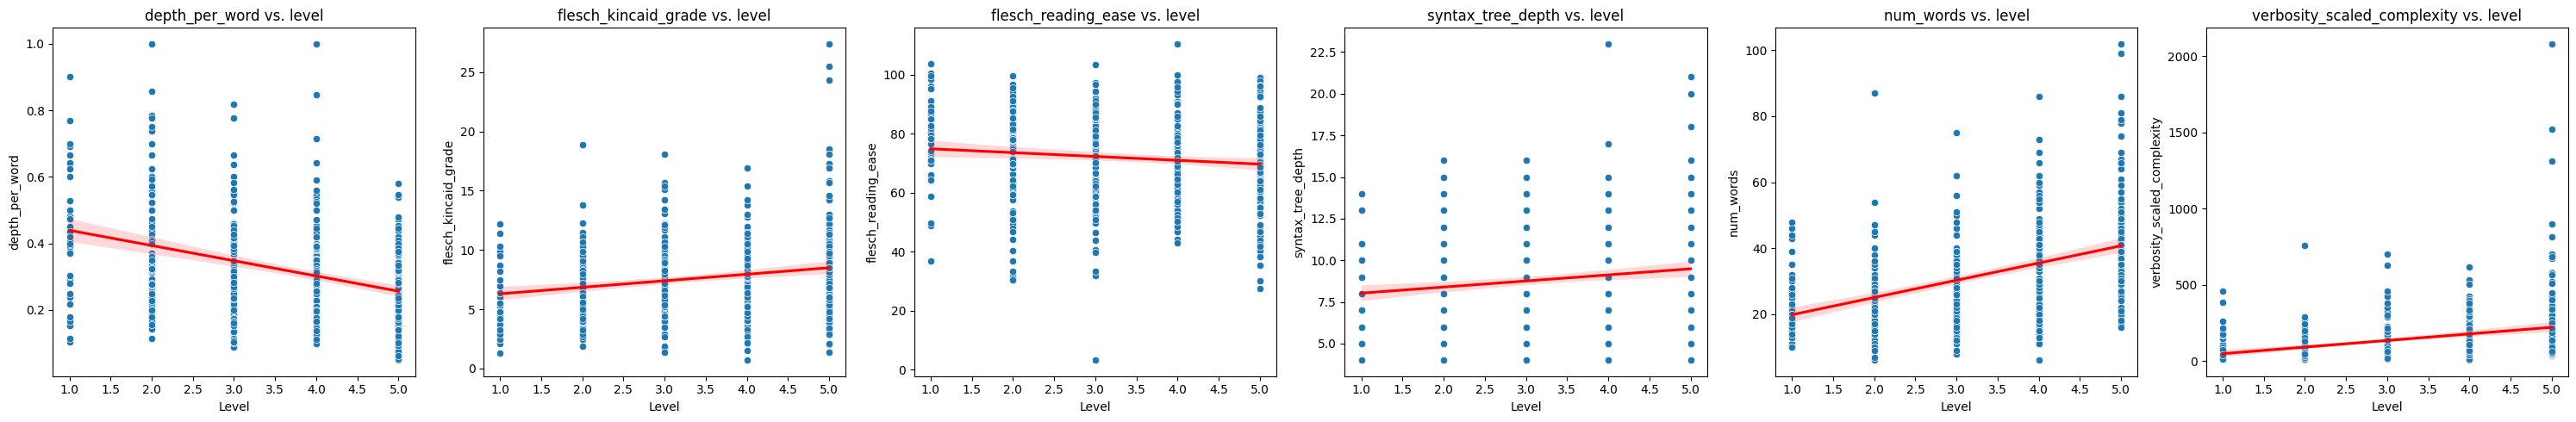

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["depth_per_word", "flesch_kincaid_grade", "flesch_reading_ease", "syntax_tree_depth", "num_words", "verbosity_scaled_complexity"]
fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))  # dynamic sizing

for ax, metric in zip(axes, metrics):
    sns.scatterplot(data=final_df, x="level", y=metric, ax=ax)
    sns.regplot(data=final_df, x="level", y=metric, scatter=False, ax=ax, color='red')
    ax.set_title(f"{metric} vs. level")
    ax.set_xlabel("Level")
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()



In [22]:
#Calculate Pearson and Spearman correlations between level and heuristics
metrics = ["depth_per_word", "flesch_kincaid_grade", "flesch_reading_ease", "syntax_tree_depth", "num_words", "verbosity_scaled_complexity"]
correlation_results = {}

for metric in metrics:
    pearson_corr = final_df["level"].corr(final_df[metric], method="pearson")
    spearman_corr = final_df["level"].corr(final_df[metric], method="spearman")
    correlation_results[metric] = {
        "Pearson": round(pearson_corr, 3),
        "Spearman": round(spearman_corr, 3)
    }

#Convert to DataFrame for display
import pandas as pd
correlation_df = pd.DataFrame(correlation_results).T
print(correlation_df)


                             Pearson  Spearman
depth_per_word                -0.357    -0.338
flesch_kincaid_grade           0.200     0.176
flesch_reading_ease           -0.113    -0.128
syntax_tree_depth              0.156     0.143
num_words                      0.438     0.469
verbosity_scaled_complexity    0.308     0.422


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Select features and target
X = final_df[["num_words", "depth_per_word", "verbosity_scaled_complexity"]]
y = final_df["level"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict the level
final_df["heuristic_level"] = model.predict(X).round().astype(int)

#Clamp values to valid range (1 to 5)
final_df["heuristic_level"] = final_df["heuristic_level"].clip(lower=1, upper=5)

print(final_df[["level", "heuristic_level"]].head())


   level  heuristic_level
0      2                4
1      5                5
2      3                4
3      3                2
4      2                3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>